In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# C5O2H8 sto6g df
# converged SCF energy = -342.638594078922
# E(RCCSD) = -343.1075902590691  E_corr = -0.468996180146809
# AFQMC energy: -343.1167 +/- 0.0003 RUNTIME: 4859.92
ccsd_corr = -0.468996180146809
afqmc_corr = -343.1167 - -342.638594078922
afqmc_err = 0.0003
print(f'df-afqmc/ccsd correlation energy: {afqmc_corr:.6f} +/- {afqmc_err:.6f}')

df-afqmc/ccsd correlation energy: -0.478106 +/- 0.000300


In [3]:
data = '''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.374945       0.000077        -0.473644       -0.371536       -0.358977       0.000645        -0.015970       0.000597        6.70    12      3.50    8       850.72
 (5.00e-04,5.00e-05)     -0.421072       0.000088        -0.476963       -0.416288       -0.398514       0.000647        -0.022554       0.000591        8.75    15      5.70    10      1408.40
 (3.00e-04,3.00e-05)     -0.447425       0.000095        -0.476672       -0.443979       -0.417627       0.000662        -0.029798       0.000596        10.90   20      8.00    14      2394.67
 (1.00e-04,1.00e-05)     -0.458695       0.000121        -0.476497       -0.453908       -0.417894       0.000678        -0.040800       0.000590        14.35   24      10.30   20      5845.51
 (1.00e-05,1.00e-06)     -0.474218       0.000230        -0.475607       -0.468316       -0.396309       0.000650        -0.077910       0.000492        24.60   34      22.40   36      34269.58
 '''

In [4]:
new_data = []
lines = data.splitlines()
for line in lines:
    columns = line.split()
    if len(columns)>1:
        if not line.startswith("#"): 
            new_data.append(columns)

new_data = np.array(new_data)

lno_thresh = []
for i in range(new_data.shape[0]):
    thresh_vir = new_data[:,0][i].split(sep=',')[1]
    thresh_vir = float(thresh_vir.strip('(),'))
    lno_thresh.append(thresh_vir)

lno_data = np.array(new_data[:,1:],dtype="float32")

lno_thresh = np.array(lno_thresh,dtype="float32")
# lno_thresh[-1] = 1e-10 # last thresh = 0.0
lno_afqmc_corr = lno_data[:,0]
lno_afqmc_err = lno_data[:,1]
lno_afqmc_mp2_corr = lno_data[:,2]
lno_ccsd_corr = lno_data[:,3]
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr

hf_cr = lno_data[:,4]
hf_cr_err = lno_data[:,5]
ccsd_cr = lno_data[:,6]
ccsd_cr_err = lno_data[:,7]
# olp_ratio = lno_data[:,14]
# olp_ratio_err = lno_data[:,15]

print(f'lno-threshold: \n',
      f'{lno_thresh}')
print(f'lno-ccsd correlation energy: \n', 
      f'{lno_ccsd_corr}')
print(f'lno-ccsd-mp2 correlation energy: \n',
      f'{lno_ccsd_mp2_corr}')
print(f'ccsd correlation energy: \n', 
      f'{ccsd_corr:.6f}')
print(f'lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): \n', 
      f'{lno_afqmc_err}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_mp2_corr}')
print(f'afqmc/ccsd correlation energy: \n', 
      f'{afqmc_corr:.6f} +/- {afqmc_err:6f}')

lno-threshold: 
 [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06]
lno-ccsd correlation energy: 
 [-0.371536 -0.416288 -0.443979 -0.453908 -0.468316]
lno-ccsd-mp2 correlation energy: 
 [-0.47023496 -0.472179   -0.47322598 -0.47171    -0.469705  ]
ccsd correlation energy: 
 -0.468996
lno-afqmc/ccsd correlation energy: 
 [-0.374945 -0.421072 -0.447425 -0.458695 -0.474218]
lno-afqmc/ccsd energy uncertainty (1 sigma): 
 [7.70e-05 8.80e-05 9.50e-05 1.21e-04 2.30e-04]
mp2 corrected lno-afqmc/ccsd correlation energy: 
 [-0.473644 -0.476963 -0.476672 -0.476497 -0.475607]
afqmc/ccsd correlation energy: 
 -0.478106 +/- 0.000300


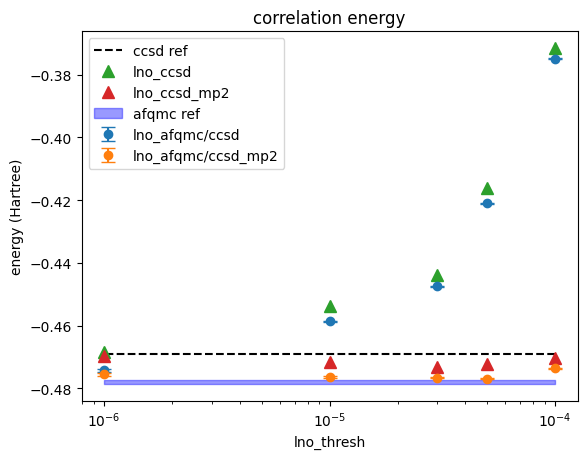

In [6]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--',label='afqmc ref')
plt.plot(x,np.array([ccsd_corr]*100),color='black', linestyle='--',label='ccsd ref')
plt.errorbar(lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(lno_thresh,lno_ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
plt.plot(lno_thresh,lno_ccsd_mp2_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([afqmc_corr]*100) + afqmc_err*2, 
                 np.array([afqmc_corr]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc ref')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('correlation energy')
plt.legend()
plt.show()

In [16]:
lno_pct = lno_afqmc_corr/afqmc_corr
lno_mp2_pct = lno_afqmc_mp2_corr/afqmc_corr
print('percentage of correlation energy captured by lno-afqmc/ccsd method')
print(f'lno_thresh: {lno_thresh}')
print(f'lno_afqmc: {lno_pct}')
print(f'lno_afqmc_mp2: {lno_mp2_pct}')

percentage of correlation energy captured by lno-afqmc/ccsd method
lno_thresh: [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06]
lno_afqmc: [0.78423    0.8807086  0.9358282  0.95940036 0.9918681 ]
lno_afqmc_mp2: [0.99066746 0.9976095  0.9970008  0.9966348  0.99477327]


In [ ]:
# full ccsd #
data = '''
# thresh(occ,vir)        afqmc_corr        err          mp2_afqmc_corr   ccsd_corr         hf_cr           err           ccsd_cr0          err            ccsd_cr1         err           ccsd_cr2          err             ccsd_cr         err         ave_olp_ratio       err         ave_norb  max_norb ave_nelec  max_nelec  run_time
  (0.001, 0.0001)        -0.170866       0.000041        -0.177614       0.000000        -0.155311       0.000483        0.741459        0.002669        -1.273171       0.004714        0.516156        0.002481        -0.015555       0.000493        0.929833        0.000414        4.40    6       5.80    7       304.21
  (0.0005, 5e-05)        -0.181874       0.000032        -0.183831       0.000000        -0.161275       0.000502        1.045348        0.003764        -1.882704       0.006866        0.816756        0.003536        -0.020598       0.000492        0.903754        0.000533        5.20    6       6.40    8       339.98
  (0.0003, 3e-05)        -0.181969       0.000033        -0.183852       0.000000        -0.160882       0.000497        1.043510        0.003683        -1.882407       0.006719        0.817810        0.003464        -0.021088       0.000488        0.904133        0.000526        5.20    6       6.80    8       349.62
  (0.0001, 1e-05)        -0.184059       0.000050        -0.184694       0.000000        -0.157568       0.000488        1.506200        0.005297        -2.797686       0.009899        1.264996        0.005017        -0.026491       0.000461        0.875606        0.000580        6.80    8       8.00    9       408.67
  (1e-05, 1e-06)         -0.187031       0.000078        -0.187060       0.000000        -0.152194       0.000455        2.346585        0.007840        -4.459606       0.014939        2.078184        0.007453        -0.034837       0.000406        0.838423        0.000652        9.20    10      9.60    10      512.27
  (1e-06, 1e-07)         -0.187519       0.000087        -0.187518       0.000000        -0.149817       0.000460        2.636664        0.009169        -5.032859       0.017532        2.358492        0.008728        -0.037702       0.000399        0.826970        0.000668        10.00           10      10.00   10      549.18
  '''
new_data = []
lines = data.splitlines()
for line in lines:
    columns = line.split()
    if len(columns)>1:
        if not line.startswith("#"): 
            new_data.append(columns)

new_data = np.array(new_data)

lno_thresh = []
for i in range(new_data.shape[0]):
    thresh_vir = new_data[:,1][i] # .split(sep=',')[1]
    thresh_vir = float(thresh_vir.strip('(),'))
    lno_thresh.append(thresh_vir)

lno_data = np.array(new_data[:,2:],dtype="float32")

lno_thresh = np.array(lno_thresh,dtype="float32")
# lno_thresh[-1] = 1e-10 # last thresh = 0.0
lno_afqmc_corr = lno_data[:,0]
lno_afqmc_err = lno_data[:,1]
lno_afqmc_mp2_corr = lno_data[:,2]
lno_ccsd_corr = lno_data[:,3]
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr

hf_cr = lno_data[:,4]
hf_cr_err = lno_data[:,5]
ccsd_cr0 = lno_data[:,6]
ccsd_cr0_err = lno_data[:,7]
ccsd_cr1 = lno_data[:,8]
ccsd_cr1_err = lno_data[:,9]
ccsd_cr2 = lno_data[:,10]
ccsd_cr2_err = lno_data[:,11]
ccsd_cr = lno_data[:,12]
ccsd_cr_err = lno_data[:,13]
olp_ratio = lno_data[:,14]
olp_ratio_err = lno_data[:,15]

print(f'lno-threshold: \n',
      f'{lno_thresh}')
print(f'lno-ccsd correlation energy: \n', 
      f'{lno_ccsd_corr}')
print(f'lno-ccsd-mp2 correlation energy: \n',
      f'{lno_ccsd_mp2_corr}')
print(f'ccsd correlation energy: \n', 
      f'{ccsd_corr:.6f}')
print(f'lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): \n', 
      f'{lno_afqmc_err}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_mp2_corr}')
print(f'afqmc/ccsd correlation energy: \n', 
      f'{afqmc_corr:.6f} +/- {afqmc_err:6f}')

lno-threshold: 
 [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06 1.e-07]
lno-ccsd correlation energy: 
 [0. 0. 0. 0. 0. 0.]
lno-ccsd-mp2 correlation energy: 
 [-6.7480057e-03 -1.9569993e-03 -1.8830001e-03 -6.3501298e-04
 -2.8997660e-05  9.9837780e-07]
ccsd correlation energy: 
 -0.185685
lno-afqmc/ccsd correlation energy: 
 [-0.170866 -0.181874 -0.181969 -0.184059 -0.187031 -0.187519]
lno-afqmc/ccsd energy uncertainty (1 sigma): 
 [4.1e-05 3.2e-05 3.3e-05 5.0e-05 7.8e-05 8.7e-05]
mp2 corrected lno-afqmc/ccsd correlation energy: 
 [-0.177614 -0.183831 -0.183852 -0.184694 -0.18706  -0.187518]
afqmc/ccsd correlation energy: 
 -0.187631 +/- 0.000100


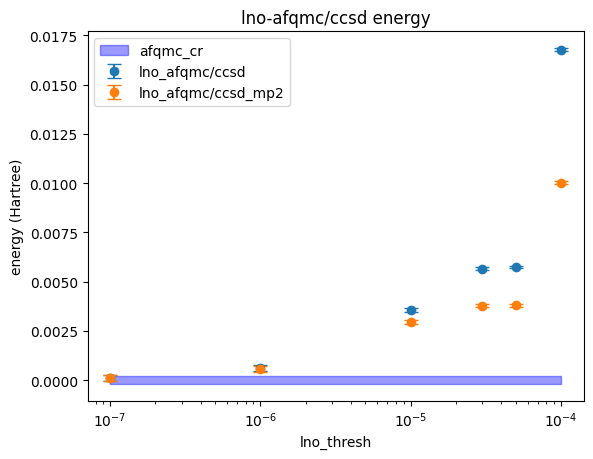

In [14]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
# plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
# plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()

In [15]:
# 20H 2aB sto6g df
# converged SCF energy = -10.40582102678
# E(RCCSD) = -10.76994547196589  E_corr = -0.3641244451858829
# AFQMC energy: -10.7754 +/- 0.0003
ccsd_corr = -0.3641244451858829
afqmc_corr = -10.7754- -10.40582102678
afqmc_err = 0.0003
print(f'df-afqmc/ccsd correlation energy: {afqmc_corr:.6f} +/- {afqmc_err:.6f}')

df-afqmc/ccsd correlation energy: -0.369579 +/- 0.000300


In [ ]:
data = '''
# thresh(occ,vir)        afqmc_corr        err          mp2_afqmc_corr   ccsd_corr         hf_cr           err           ccsd_cr0          err            ccsd_cr1         err           ccsd_cr2          err             ccsd_cr         err         ave_olp_ratio       err         ave_norb  max_norb ave_nelec  max_nelec  run_time
  (0.001, 0.0001)        -0.341414       0.000042        -0.354394       -0.342242       -0.308257       0.000649        1.799592        0.004440        -3.180092       0.008005        1.347346        0.004120        -0.033156       0.000640        0.916579        0.000467        5.20    6       6.80    8       912.51
  (0.0005, 5e-05)        -0.353084       0.000048        -0.360564       -0.353568       -0.313116       0.000650        2.104476        0.005143        -3.792005       0.009402        1.647562        0.004822        -0.039968       0.000637        0.904143        0.000511        5.60    6       8.00    9       1039.45
  (0.0003, 3e-05)        -0.353385       0.000047        -0.360687       -0.353652       -0.314190       0.000648        2.114741        0.005111        -3.816498       0.009362        1.662563        0.004811        -0.039195       0.000636        0.903763        0.000514        5.60    6       8.40    10      1086.57
  (0.0001, 1e-05)        -0.362217       0.000077        -0.364315       -0.361442       -0.303866       0.000624        3.726311        0.008884        -6.996219       0.016796        3.211558        0.008400        -0.058352       0.000582        0.856054        0.000629        8.40    10      11.00   13      1707.40
  (1e-05, 1e-06)         -0.367331       0.000148        -0.367583       -0.364368       -0.280057       0.000578        6.729985        0.015969        -12.956470      0.030815        6.139208        0.015220        -0.087277       0.000479        0.783049        0.000740        13.20   16      15.80   18      3450.20
  (1e-06, 1e-07)         -0.368913       0.000220        -0.368923       -0.364236       -0.258863       0.000557        9.841116        0.024169        -19.105274      0.046975        9.154106        0.023109        -0.110051       0.000402        0.723528        0.000777        18.00   20      19.00   20      5597.28
  '''
new_data = []
lines = data.splitlines()
for line in lines:
    columns = line.split()
    if len(columns)>1:
        if not line.startswith("#"): 
            new_data.append(columns)

new_data = np.array(new_data)

lno_thresh = []
for i in range(new_data.shape[0]):
    thresh_vir = new_data[:,1][i] # .split(sep=',')[1]
    thresh_vir = float(thresh_vir.strip('(),'))
    lno_thresh.append(thresh_vir)

lno_data = np.array(new_data[:,2:],dtype="float32")

lno_thresh = np.array(lno_thresh,dtype="float32")
# lno_thresh[-1] = 1e-10 # last thresh = 0.0
lno_afqmc_corr = lno_data[:,0]
lno_afqmc_err = lno_data[:,1]
lno_afqmc_mp2_corr = lno_data[:,2]
lno_ccsd_corr = lno_data[:,3]
lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr

hf_cr = lno_data[:,4]
hf_cr_err = lno_data[:,5]
ccsd_cr0 = lno_data[:,6]
ccsd_cr0_err = lno_data[:,7]
ccsd_cr1 = lno_data[:,8]
ccsd_cr1_err = lno_data[:,9]
ccsd_cr2 = lno_data[:,10]
ccsd_cr2_err = lno_data[:,11]
ccsd_cr = lno_data[:,12]
ccsd_cr_err = lno_data[:,13]
olp_ratio = lno_data[:,14]
olp_ratio_err = lno_data[:,15]

print(f'lno-threshold: \n',
      f'{lno_thresh}')
print(f'lno-ccsd correlation energy: \n', 
      f'{lno_ccsd_corr}')
print(f'lno-ccsd-mp2 correlation energy: \n',
      f'{lno_ccsd_mp2_corr}')
print(f'ccsd correlation energy: \n', 
      f'{ccsd_corr:.6f}')
print(f'lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): \n', 
      f'{lno_afqmc_err}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_mp2_corr}')
print(f'afqmc/ccsd correlation energy: \n', 
      f'{afqmc_corr:.6f} +/- {afqmc_err:6f}')

lno-threshold: 
 [1.e-04 5.e-05 3.e-05 1.e-05 1.e-06 1.e-07]
lno-ccsd correlation energy: 
 [-0.342242 -0.353568 -0.353652 -0.361442 -0.364368 -0.364236]
lno-ccsd-mp2 correlation energy: 
 [-0.355222   -0.36104798 -0.360954   -0.36354    -0.36462    -0.364246  ]
ccsd correlation energy: 
 -0.364124
lno-afqmc/ccsd correlation energy: 
 [-0.341414 -0.353084 -0.353385 -0.362217 -0.367331 -0.368913]
lno-afqmc/ccsd energy uncertainty (1 sigma): 
 [4.20e-05 4.80e-05 4.70e-05 7.70e-05 1.48e-04 2.20e-04]
mp2 corrected lno-afqmc/ccsd correlation energy: 
 [-0.354394 -0.360564 -0.360687 -0.364315 -0.367583 -0.368923]
afqmc/ccsd correlation energy: 
 -0.369579 +/- 0.000300


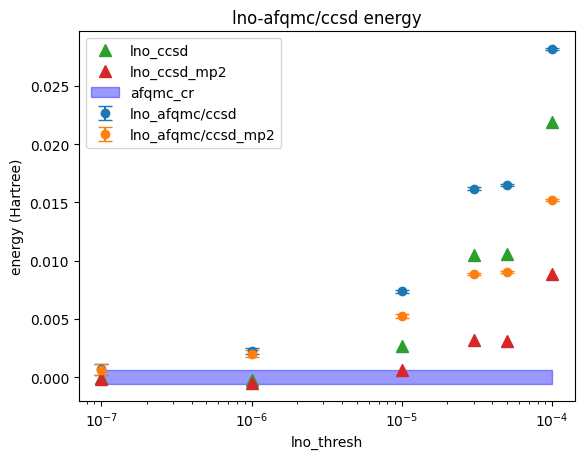

In [17]:
x = np.linspace(max(lno_thresh),min(lno_thresh),100)
# plt.plot(x,np.array([afqmc_corr]*100),color='black', linestyle='--')
plt.errorbar(lno_thresh,lno_afqmc_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(lno_thresh,lno_afqmc_mp2_corr-afqmc_corr,yerr=lno_afqmc_err*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(lno_thresh,lno_ccsd_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd')
plt.plot(lno_thresh,lno_ccsd_mp2_corr-ccsd_corr,marker='^',linestyle='None',markersize=8,label='lno_ccsd_mp2')
plt.fill_between(x, np.array([0]*100) + afqmc_err*2, 
                 np.array([0]*100) - afqmc_err*2, color='blue', 
                 alpha=0.4,label='afqmc_cr')
plt.xscale('log')
plt.xlabel('lno_thresh')
plt.ylabel('energy (Hartree)')
plt.title('lno-afqmc/ccsd energy')
plt.legend()
plt.show()